In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [7]:
np.random.seed(42)
n = 1000
rw = np.random.normal(0,1,size=n).cumsum()
data = pd.DataFrame(rw,columns=['rw'])
data.head()

,rw
0,0.496714
1,0.358450
2,1.006138
3,2.529168
4,2.295015


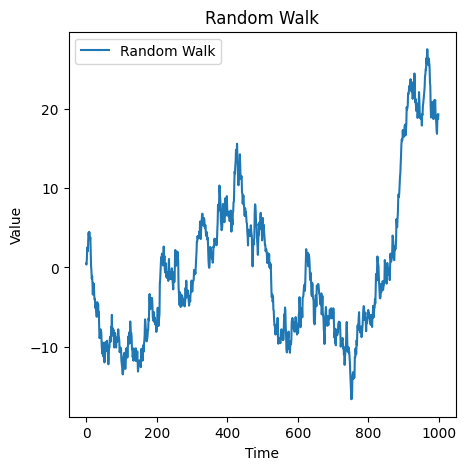

In [4]:
plt.figure(figsize=(5,5))
plt.plot(data,label ='Random Walk')
plt.legend()
plt.title('Random Walk')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [8]:
result = adfuller(data['rw'] )
print(result)
print('ADF Statistic: ', result[0])
print('p-value: ',result[1])
print('Critical Values:')
for i, value in result[4].items():
    print(f'{i}: {value}')

(-0.9659524876918764, 0.7654789696692577, 0, 999, {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}, 2735.4178367833106)
ADF Statistic:  -0.9659524876918764
p-value:  0.7654789696692577
Critical Values:
1%: -3.4369127451400474
5%: -2.864437475834273
10%: -2.568312754566378


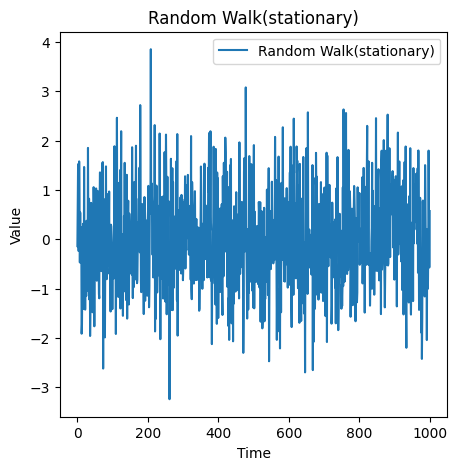

In [9]:
data1 = data.diff().dropna()
plt.figure(figsize=(5,5))
plt.plot(data1,label ='Random Walk(stationary)')
plt.legend()
plt.title('Random Walk(stationary)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [10]:
result1 = adfuller(data1['rw'] )
print(result1)
print('ADF Statistic: ', result1[0])
print('p-value: ',result1[1])
print('Critical Values:')
for i ,value in result1[4].items():
    print(f'{i}: {value}')

(-31.789310857560594, 0.0, 0, 998, {'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573}, 2732.1890358304863)
ADF Statistic:  -31.789310857560594
p-value:  0.0
Critical Values:
1%: -3.4369193380671
5%: -2.864440383452517
10%: -2.56831430323573


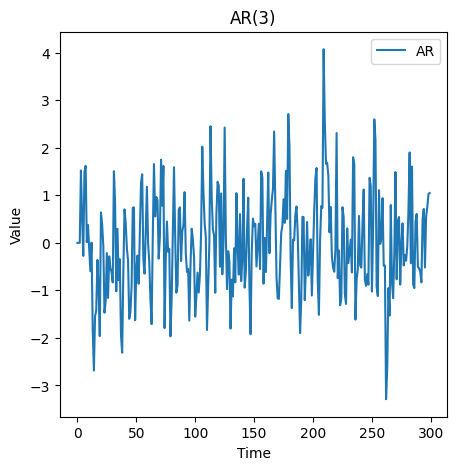

In [2]:
np.random.seed(42)
phi1 = 0.5
phi2 = -0.2
phi3 = 0.1
n = 300
et = np.random.normal(0,1,size=n)
data = np.zeros(n)
for i in range(3,n):
  data[i] = phi1*data[i-1] + phi2*data[i-2] + phi3*data[i-3] + et[i]
plt.figure(figsize=(5,5))
plt.plot(data,label ='AR')
plt.legend()
plt.title('AR(3)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [3]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(data,lags=3)
model_fit = model.fit()
print(model_fit.summary())
print(model_fit.params)  #it will give the estimated coefficients of the AR process

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  300
Model:                     AutoReg(3)   Log Likelihood                -416.159
Method:               Conditional MLE   S.D. of innovations              0.982
Date:                Wed, 08 Jan 2025   AIC                            842.317
Time:                        20:42:11   BIC                            860.786
Sample:                             3   HQIC                           849.711
                                  300                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0107      0.057     -0.188      0.851      -0.123       0.101
y.L1           0.4128      0.058      7.126      0.000       0.299       0.526
y.L2          -0.1679      0.062     -2.711      0.0